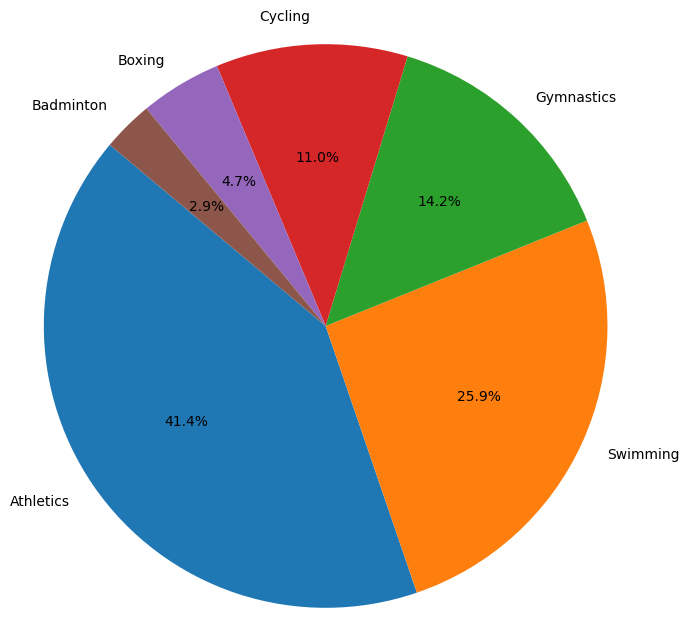

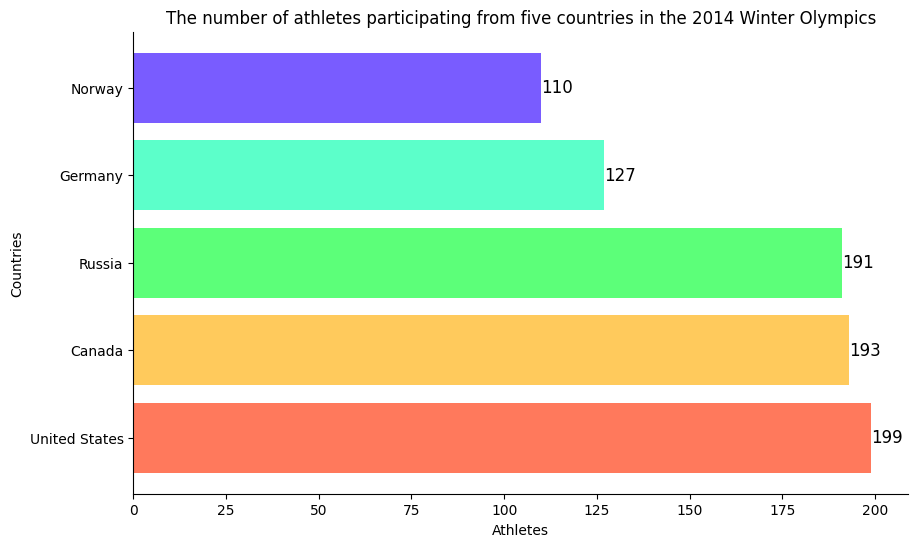

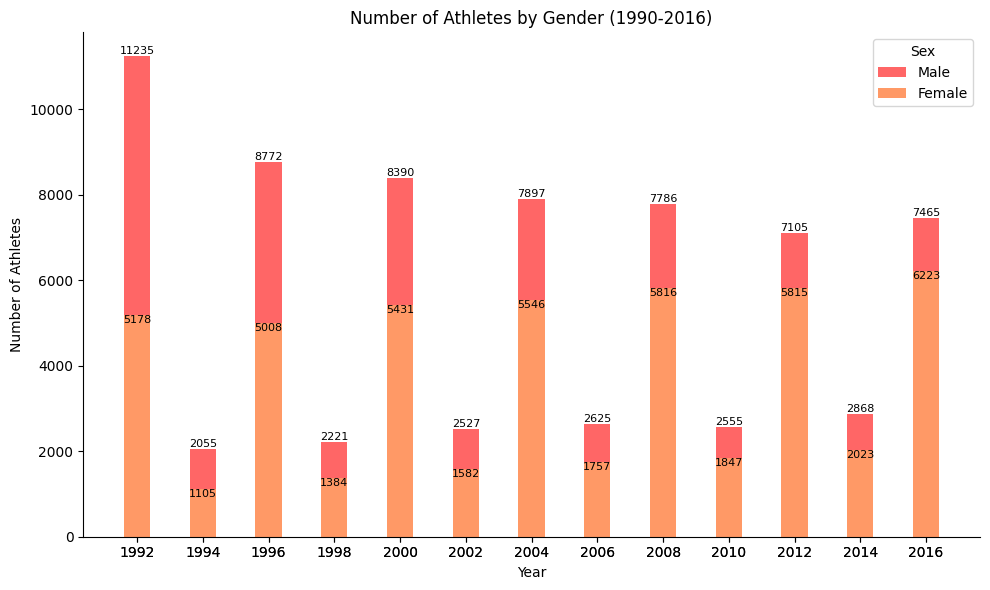

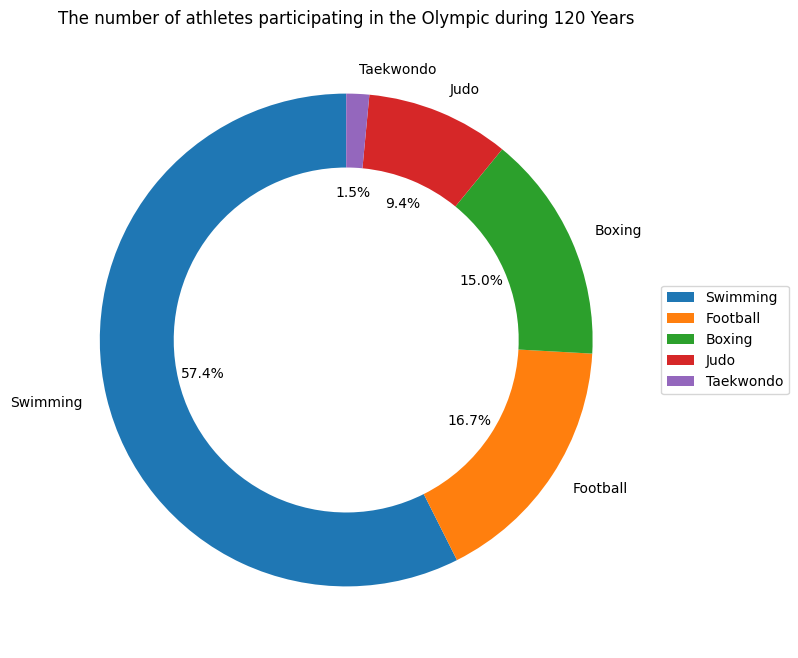

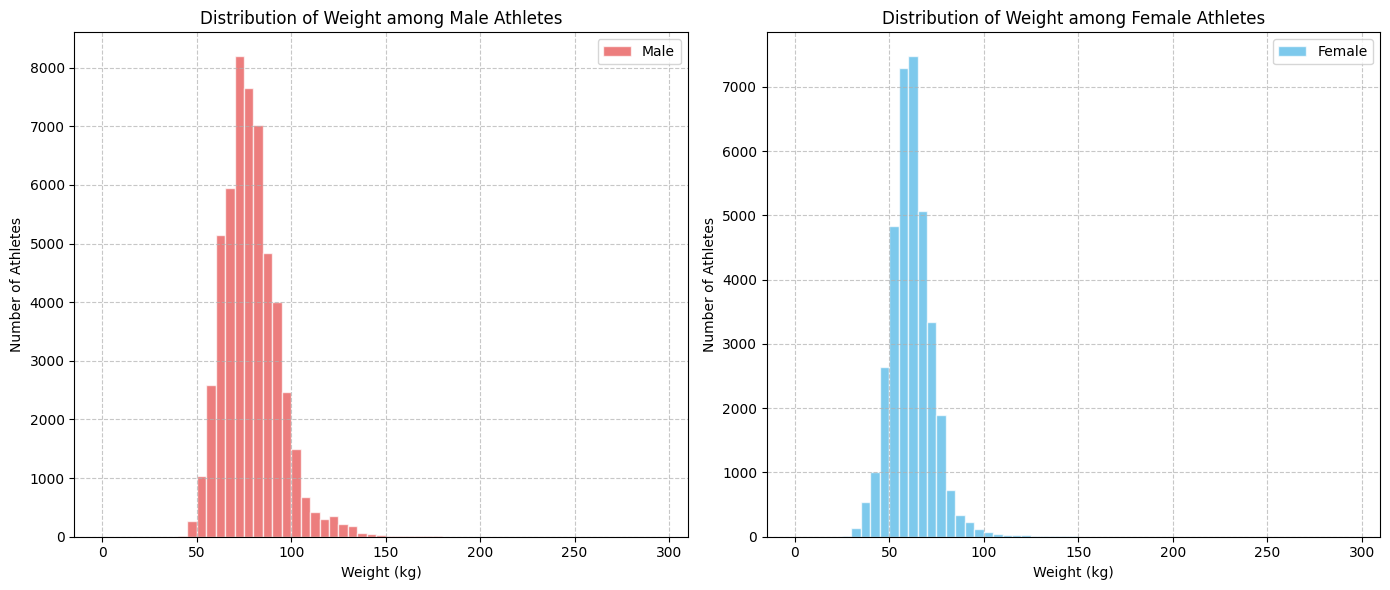

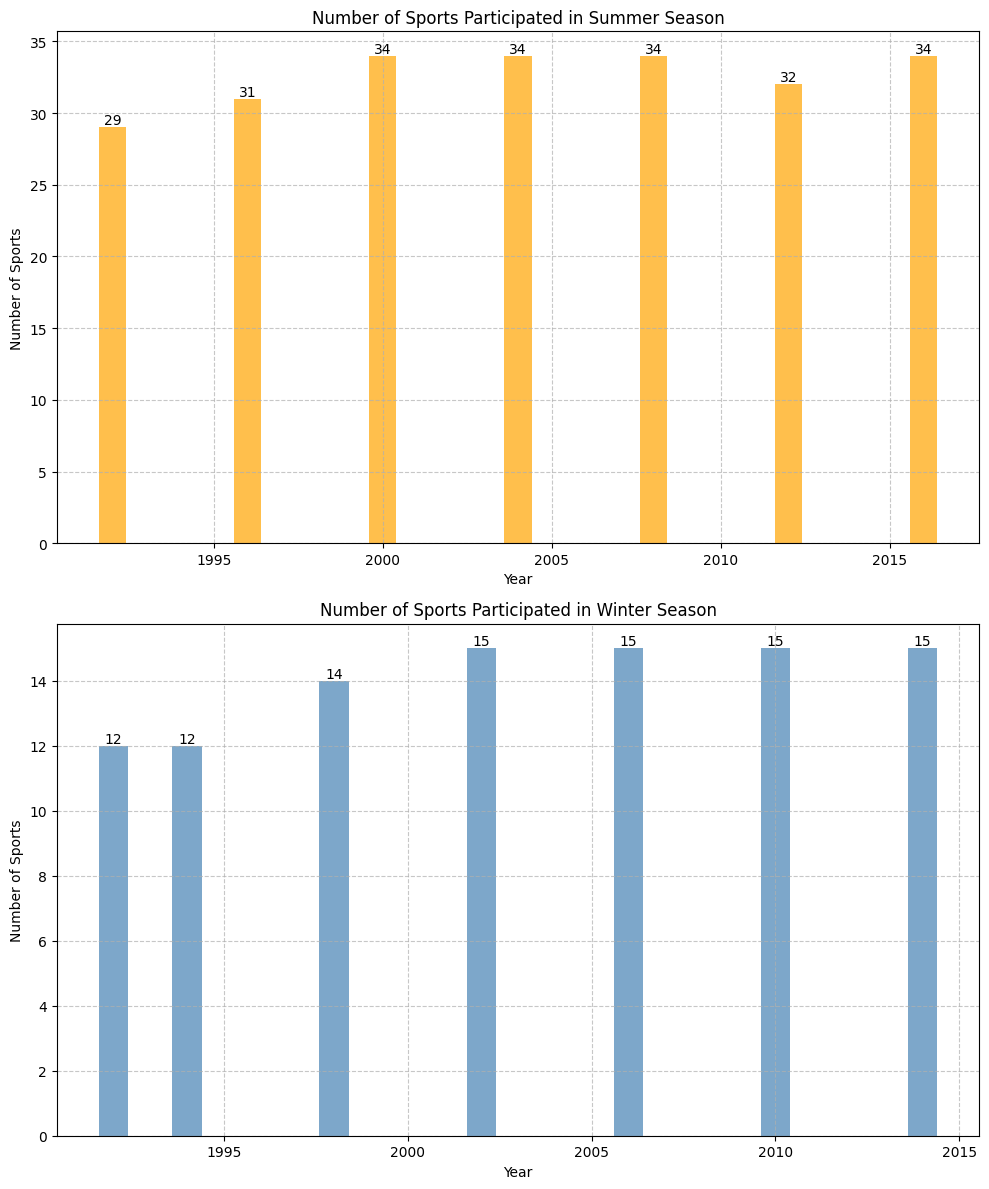

C:\Users\admin\AppData\Local\Temp\ipykernel_35392\3844698664.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2002['Age'] = pd.to_numeric(year2002['Age'], errors='coerce')


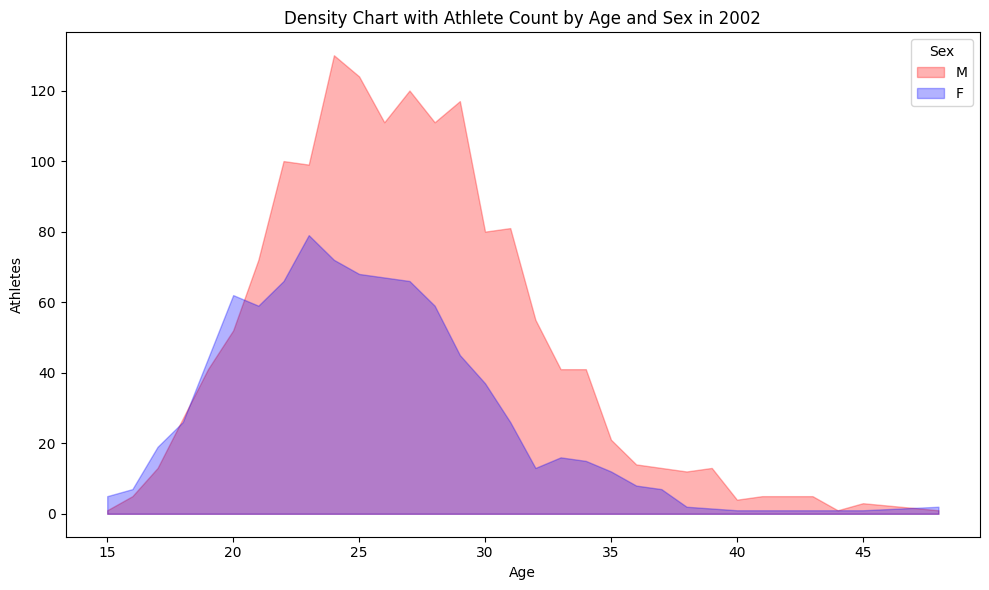

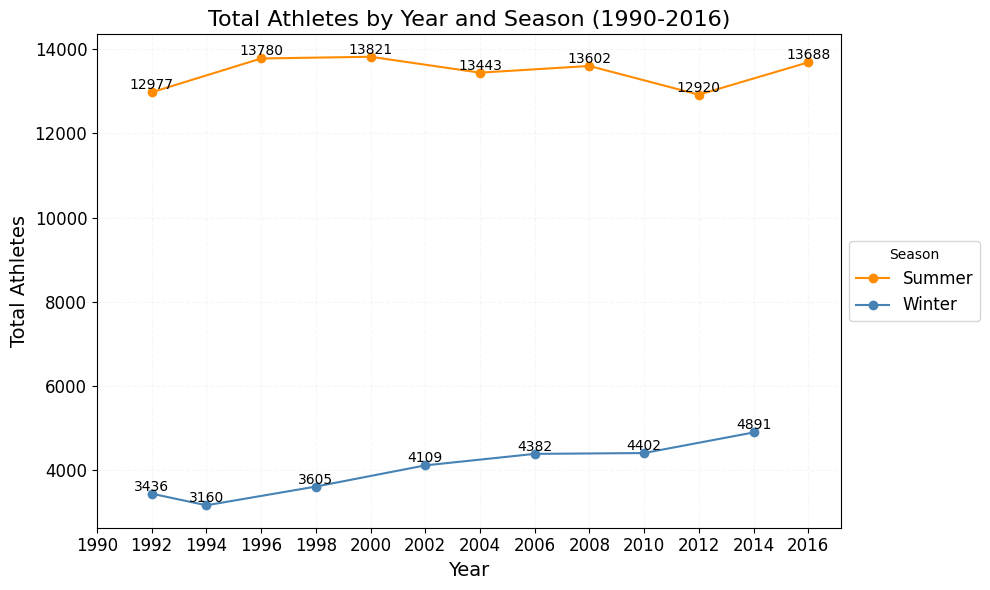

C:\Users\admin\AppData\Local\Temp\ipykernel_35392\3844698664.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sport_age['Year'] = pd.to_numeric(sport_age['Year'])
C:\Users\admin\AppData\Local\Temp\ipykernel_35392\3844698664.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sport_age['Age'] = pd.to_numeric(sport_age['Age'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_35392\3844698664.py:292: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

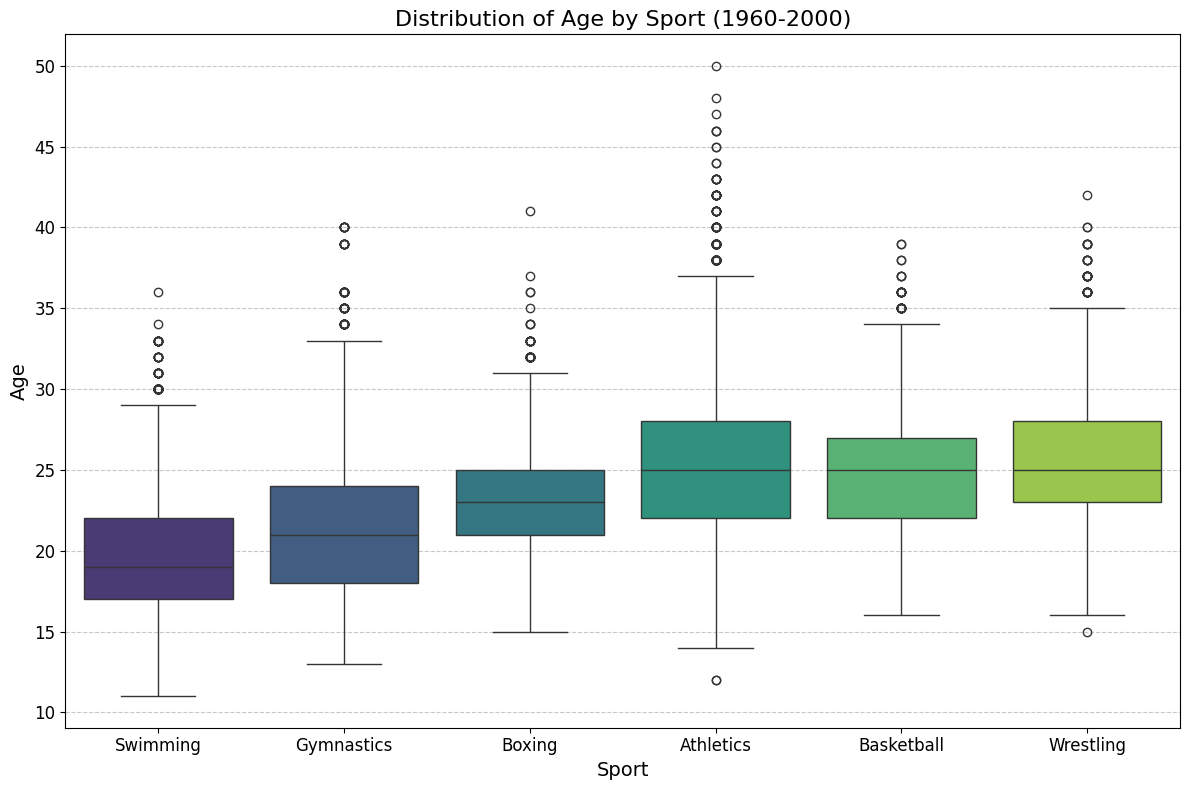

C:\Users\admin\AppData\Local\Temp\ipykernel_35392\3844698664.py:313: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


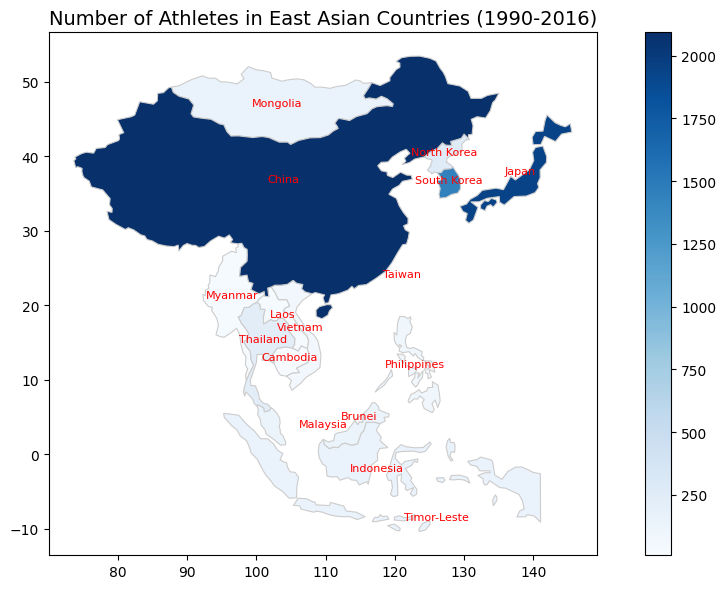

In [15]:
import pandas as pd
athlete_events = pd.read_csv(r'D:\Math dealine\athlete_events.csv')
#PIE CHART
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'athlete_events' DataFrame loaded

selected_sports = ["Athletics", "Badminton", "Boxing", "Cycling", "Gymnastics", "Swimming"]
my_data = athlete_events[(athlete_events['Year'] == 2016) & (athlete_events['Sport'].isin(selected_sports))]

# Calculate percentage of each sport
sport_counts = my_data['Sport'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sport_counts, labels=sport_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# BAR CHART
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'athlete_events' DataFrame loaded

# Filtering data for the year 2014
Year2014 = athlete_events[athlete_events['Year'] == 2014]

# Selecting teams
Teams = ["United States", "Russia", "Norway", "Germany", "Canada"]

# Filtering data for selected teams
m_data = Year2014[Year2014['Team'].isin(Teams)]

# Keeping unique entries for each athlete
m_data_unique = m_data.drop_duplicates(subset='Name', keep='first')

# Counting occurrences of each team
team_counts = m_data_unique['Team'].value_counts().reset_index()
team_counts.columns = ['Team', 'Count']
team_counts = team_counts.sort_values(by='Count', ascending=False)

# Creating custom colors for each team
unique_colors = ["#FF5733", "#FFBD33", "#33FF57", "#33FFBD", "#5733FF"]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(team_counts['Team'], team_counts['Count'], color=unique_colors, alpha=0.8)

# Adding text labels inside the bars
average_width = team_counts['Count'].mean()
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, int(bar.get_width()), ha='left', va='center', color='black', fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title("The number of athletes participating from five countries in the 2014 Winter Olympics")
plt.xlabel("Athletes")
plt.ylabel("Countries")

plt.show()

# BAR CHART 2
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'athlete_events' DataFrame loaded

# Filtering data for the years 1990 to 2016
filtered_data = athlete_events[(athlete_events['Year'] >= 1990) & (athlete_events['Year'] <= 2016)]

# Filtering out rows where 'Sex' is missing
filtered_data = filtered_data.dropna(subset=['Sex'])

# Grouping data by year and sex, and counting occurrences
yearly_gender_counts = filtered_data.groupby(['Year', 'Sex']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
colors = {'M': '#FF6666', 'F': '#FF9966'}
for sex in ['M', 'F']:
    data = yearly_gender_counts[yearly_gender_counts['Sex'] == sex]
    plt.bar(data['Year'], data['count'], color=colors[sex], label=sex)
    for i, count in enumerate(data['count']):
        if sex == 'M':
            plt.text(data['Year'].iloc[i], count, str(count), ha='center', va='bottom', color='black', fontsize=8)
        else:
            # Adjusting the position of female count to be in front of male count
            plt.text(data['Year'].iloc[i], count, str(count), ha='center', va='top', color='black', fontsize=8)

plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes by Gender (1990-2016)")
plt.legend(title='Sex', labels=['Male', 'Female'])

# Removing white grid lines
plt.grid(axis='y', linestyle='--', alpha=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show detailed numbers of the year in individual cells
plt.xticks(yearly_gender_counts['Year'])
plt.tight_layout()
plt.show()

# DONUT CHART
import pandas as pd
import matplotlib.pyplot as plt

# I'm assuming you have a pandas DataFrame named athlete_events containing the necessary data

b_data = athlete_events[athlete_events['Sport'].isin(["Boxing", "Football", "Judo", "Swimming", "Taekwondo"])]

athlete_counts = b_data['Sport'].value_counts().reset_index()
athlete_counts.columns = ['Sport', 'count']

plt.figure(figsize=(8, 8))
plt.pie(athlete_counts['count'], labels=athlete_counts['Sport'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors, wedgeprops=dict(width=0.3))
plt.gca().add_patch(plt.Circle((0, 0), 0.5, color='white'))
plt.title('The number of athletes participating in the Olympic during 120 Years')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


# BAR CHART 2 GRAPHS
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a pandas DataFrame named athlete_events

filtered_dat = athlete_events[(athlete_events['Season'] == "Summer") & (athlete_events['Year'] >= 1990) & (athlete_events['Year'] <= 2016)]
filtered_dat = filtered_dat[['Weight', 'Sex']].dropna()

filtered_dat['Weight'] = pd.to_numeric(filtered_dat['Weight'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for males
axs[0].hist(filtered_dat[filtered_dat['Sex'] == 'M']['Weight'], bins=range(0, 300, 5), color='#E54646', edgecolor='white', alpha=0.7, label='Male', density=False)
axs[0].set_xlabel('Weight (kg)')
axs[0].set_ylabel('Number of Athletes')
axs[0].set_title('Distribution of Weight among Male Athletes')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.7)

# Plot for females
axs[1].hist(filtered_dat[filtered_dat['Sex'] == 'F']['Weight'], bins=range(0, 300, 5), color='#46B3E5', edgecolor='white', alpha=0.7, label='Female', density=False)
axs[1].set_xlabel('Weight (kg)')
axs[1].set_ylabel('Number of Athletes')
axs[1].set_title('Distribution of Weight among Female Athletes')
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# BAR CHART 2 GRAPHS( 2)
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a pandas DataFrame named athlete_events

filtered_dat = athlete_events[athlete_events['Year'] >= 1990]
filtered_dat = filtered_dat[['Year', 'Season', 'Sport']].drop_duplicates()

# Counting the number of sports participated by year and season
sports_count = filtered_dat.groupby(['Year', 'Season']).size().reset_index(name='count')

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plotting for Summer season
summer_data = sports_count[sports_count['Season'] == 'Summer']
axs[0].bar(summer_data['Year'], summer_data['count'], color='#FFA500', alpha=0.7)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Sports')
axs[0].set_title('Number of Sports Participated in Summer Season')
axs[0].grid(True, linestyle='--', alpha=0.7)

# Adding text labels for Summer
for i, count in enumerate(summer_data['count']):
    axs[0].text(summer_data['Year'].iloc[i], count, str(count), ha='center', va='bottom')

# Plotting for Winter season
winter_data = sports_count[sports_count['Season'] == 'Winter']
axs[1].bar(winter_data['Year'], winter_data['count'], color='#4682B4', alpha=0.7)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Sports')
axs[1].set_title('Number of Sports Participated in Winter Season')
axs[1].grid(True, linestyle='--', alpha=0.7)

# Adding text labels for Winter
for i, count in enumerate(winter_data['count']):
    axs[1].text(winter_data['Year'].iloc[i], count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# DESTINY CHART 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a pandas DataFrame named athlete_events

# Filter data for the year 2002
year2002 = athlete_events[athlete_events['Year'] == 2002]

# Convert Age to numeric
year2002['Age'] = pd.to_numeric(year2002['Age'], errors='coerce')

# Drop duplicate entries keeping only the first occurrence
year2002_count = year2002.drop_duplicates(subset=['ID', 'Age', 'Sex'])

# Group by Age and Sex and count occurrences
year2002_count = year2002_count.groupby(['Age', 'Sex']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the data
for sex, color in zip(['M', 'F'], ['red', 'blue']):
    data = year2002_count[year2002_count['Sex'] == sex]
    plt.fill_between(data['Age'], data['count'], color=color, alpha=0.3, label=sex)

plt.xlabel('Age')
plt.ylabel('Athletes')
plt.title('Density Chart with Athlete Count by Age and Sex in 2002')
plt.legend(title='Sex')
plt.grid(True, linestyle='--', alpha=0)
plt.tight_layout()
plt.show()


# LINE GRAPH 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a pandas DataFrame named athlete_events

# Filter data for the years 1990 to 2016
filtered_dat = athlete_events[(athlete_events['Year'] >= 1990) & (athlete_events['Year'] <= 2016)]

# Summarize data by year and season
summary_dat = filtered_dat.groupby(['Year', 'Season']).size().reset_index(name='total_athletes')

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting lines and points for each season
for season, color in zip(['Summer', 'Winter'], ['darkorange', 'steelblue']):
    data = summary_dat[summary_dat['Season'] == season]
    plt.plot(data['Year'], data['total_athletes'], marker='o', linestyle='-', color=color, label=season)

    # Adding text labels for total athletes
    for i, row in data.iterrows():
        plt.text(row['Year'], row['total_athletes'], str(row['total_athletes']), ha='center', va='bottom', fontsize=10)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Athletes', fontsize=14)
plt.title('Total Athletes by Year and Season (1990-2016)', fontsize=16)
plt.legend(title='Season', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.grid(True, linestyle='--', alpha=0.1)
plt.xticks(range(1990, 2017, 2), fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# PLOT CHART 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the dataset into a pandas DataFrame named athlete_events

# Filter data for the years 1960 to 2000 and selected sports
selected_sports = ["Basketball", "Gymnastics", "Swimming", "Athletics", "Boxing", "Wrestling"]
sport_age = athlete_events[(athlete_events['Year'] >= 1960) & (athlete_events['Year'] <= 2000) & athlete_events['Sport'].isin(selected_sports)]

# Convert columns to numeric
sport_age['Year'] = pd.to_numeric(sport_age['Year'])
sport_age['Age'] = pd.to_numeric(sport_age['Age'], errors='coerce')

# Calculate the median age for each sport and sort sports based on their median age
sport_medians = sport_age.groupby('Sport')['Age'].median().sort_values().index

# Plot boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=sport_age, x='Sport', y='Age', order=sport_medians, palette='viridis')
plt.xticks( ha='center', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Sport', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Distribution of Age by Sport (1960-2000)', fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# MAP 
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the list of East Asian countries
east_asian_countries = ["China", "Japan", "South Korea", "North Korea", "Taiwan", "Hong Kong", "Mongolia", "Macau", 
                        "Vietnam", "Laos", "Cambodia", "Thailand", "Myanmar", "Malaysia", "Singapore", "Brunei", 
                        "Philippines", "Indonesia", "Timor-Leste"]

# Load world map data
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the map data for East Asian countries
east_asian_map = world_map[world_map['name'].isin(east_asian_countries)]

# Merge athlete counts with map data
athlete_counts = athlete_events[(athlete_events['Team'].isin(east_asian_countries)) & 
                                (athlete_events['Year'].between(1990, 2016))]\
                    .groupby('Team')['ID'].nunique().reset_index(name='athlete_count')

east_asian_map_with_athletes = east_asian_map.merge(athlete_counts, left_on='name', right_on='Team', how='left')

# Define palette colors
palette_colors = ['#66CCFF', '#0099FF', '#0066FF', '#0033CC', '#000099']

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
east_asian_map_with_athletes.plot(column='athlete_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add country names as text labels
for idx, row in east_asian_map_with_athletes.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['name'], ha='center', fontsize=8, color='red')

# Set plot title and adjust layout
ax.set_title('Number of Athletes in East Asian Countries (1990-2016)', fontsize=14)
plt.tight_layout()
plt.show()

In [1]:
pip install jupyterlab


In [13]:
!pip install streamlit


In [16]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install jupyter

In [2]:
pip install jupyterlab


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install notebook


Note: you may need to restart the kernel to use updated packages.
